<a href="https://colab.research.google.com/github/DavAnalyst/Data-Science/blob/main/CO2_Emissions_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CO2 CONSUMPTION PREDICTION

- THE OBJECTIVE

The objective is to build a predictive model for fuel consumption and Carbon dioxide emission of cars in Canada.

linea de prueba


In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

ABOUT THE DATASET
- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [3]:
df = pd.read_csv("FuelConsumption.csv")

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [7]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


We can plot each of these features

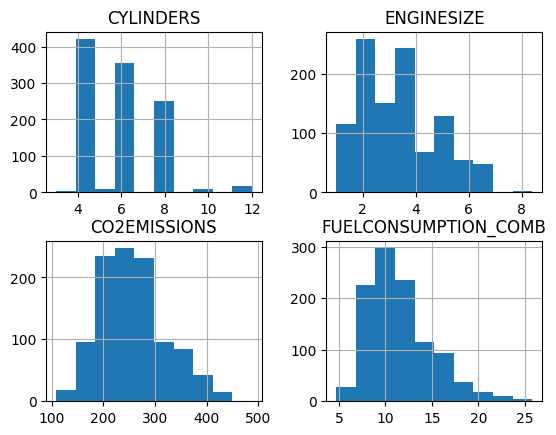

In [8]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is:

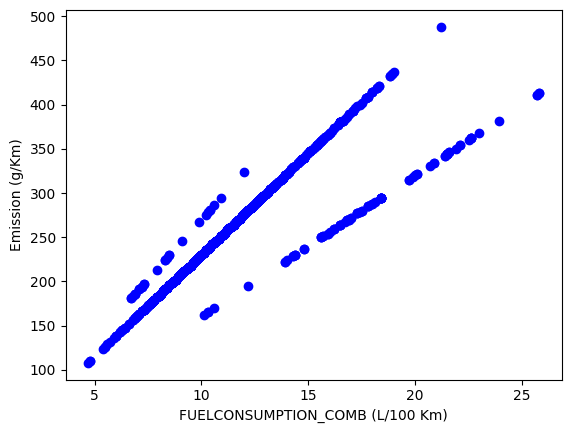

In [9]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB (L/100 Km)")
plt.ylabel("Emission (g/Km)")
plt.show()

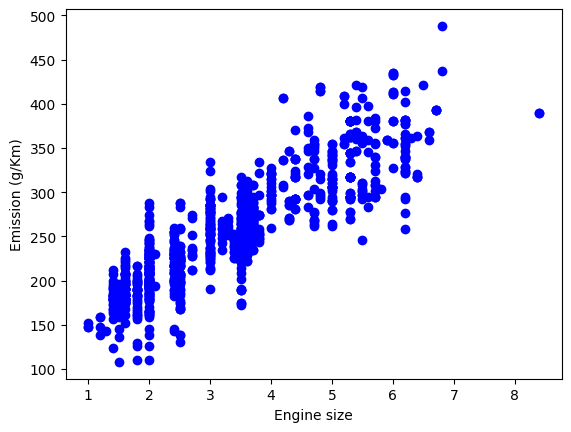

In [10]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission (g/Km)")
plt.show()

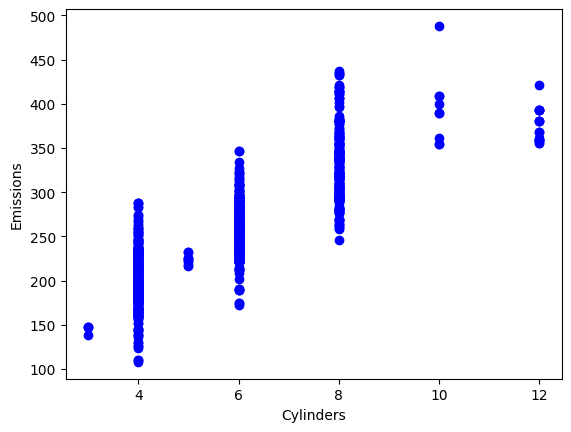

In [11]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS, color="blue")
plt.xlabel("Cylinders")
plt.ylabel("Emissions")
plt.show()

Creating train and test dataset

In [18]:
ENGINESIZE = df[['ENGINESIZE']].values
CO2 = df[['CO2EMISSIONS']].values

ENGINESIZE_train, ENGINESIZE_test, CO2_train,CO2_test = train_test_split(ENGINESIZE,CO2,test_size=0.2,random_state=4)

reg = linear_model.LinearRegression()
reg.fit(ENGINESIZE_train,CO2_train)

print('Coefficients: ', reg.coef_)
print('Intercept: ', reg.intercept_)

Coefficients:  [[39.116937]]
Intercept:  [125.14677576]


Text(0, 0.5, 'Emission')

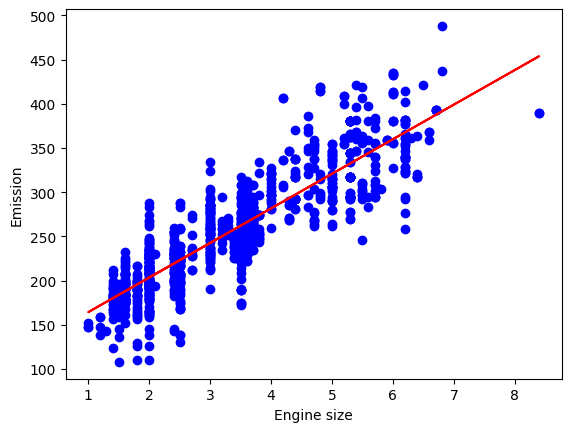

In [19]:
plt.scatter(ENGINESIZE,CO2,color ='blue')
plt.plot(ENGINESIZE,reg.coef_[0][0]*ENGINESIZE+reg.intercept_[0],'-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Multiple linear regression

In [21]:
features = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']].values
target = df['CO2EMISSIONS'].values

X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.2,random_state=4)

mult_reg = linear_model.LinearRegression()
mult_reg.fit(X_train,y_train)
print('Coefficients: ', mult_reg.coef_)


Coefficients:  [10.24537129  7.64355532  9.68132732]


Coefficients of Multiple linear Regression equation

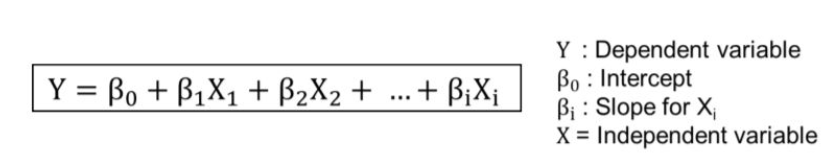

PREDICTION

In [26]:
y_hat = mult_reg.predict(X_test)

EVALUATION

WE CALCULATE THE MEAN SQUARE ERROR AND VARIANCE SCORE

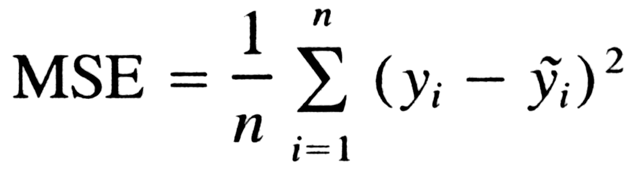

In [27]:
print('Mean Square Error: %.2f' % np.mean((y_hat-y_test)**2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % mult_reg.score(X_test, y_test))

Mean Square Error: 408.38
Variance score: 0.89
